# Alpaha Channel

+ The alpha channel is a fourth channel that some file formats support.
+ Allows specify the degree of transparency in selected regions of an image.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from IPython.display import Image
plt.rcParams['image.cmap'] = 'gray'

### Read PNG image and split channels

(2436, 2623, 4)


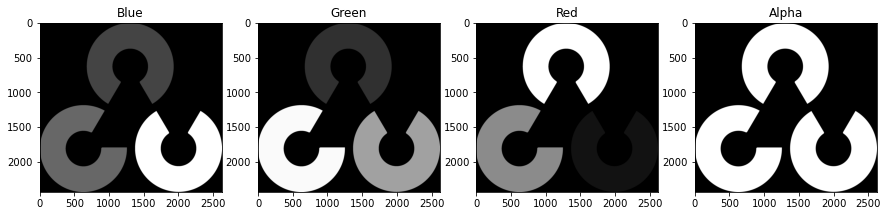

In [2]:
# Read the PNG image using: cv2.IMREAD_UNCHANGED to retain the alpha channel.
img = cv2.imread('opencv_logo.png', cv2.IMREAD_UNCHANGED)

print(img.shape)

# Split the channels.
b, g, r, a = cv2.split(img)

# Display each of the channels.
plt.figure(figsize=(15, 15))
plt.subplot(141); plt.imshow(b); plt.title('Blue')
plt.subplot(142); plt.imshow(g); plt.title('Green')
plt.subplot(143); plt.imshow(r); plt.title('Red')
plt.subplot(144); plt.imshow(a); plt.title('Alpha');

### Create an PNG transparent file from a JPG file

Shape of the color image: (640, 640, 3)


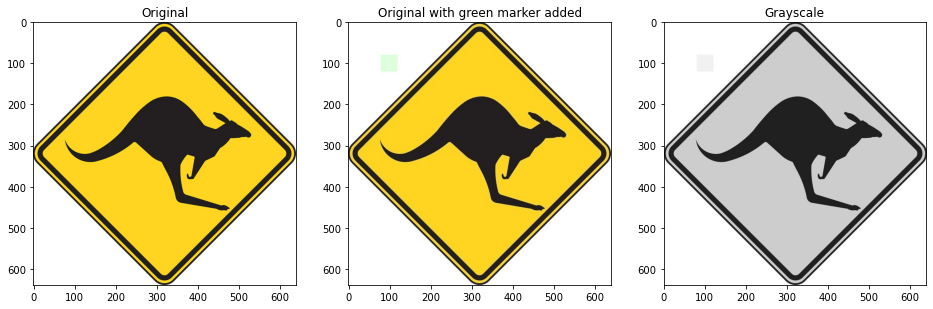

In [3]:
# Read the original and modified JPG images of the kangaroo sign.
img_kang_org = cv2.imread('kangaroo.jpg', cv2.IMREAD_COLOR)
img_kang = cv2.imread('kangaroo_sign_with_green_marker.jpg', cv2.IMREAD_COLOR)

# For reference: Code used to add light green marker to original image of the kangaroo sign.
# img_kang_org[80:120, 80:120, 0] = 220
# img_kang_org[80:12, 80:120, 1] = 255
# img_kang_org[80:12, 80:120, 2] = 220
# cv2.write('kangaroo_sign_with_green_marker.jpg', img_kang_org)

# Print the image shapes to verify the channels.
print(f'Shape of the color image: {img_kang.shape}')

# Convert the image to gray scale.
img_kang_gray = cv2.cvtColor(img_kang, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(16, 10))
plt.subplot(131); plt.imshow(img_kang_org[:, :, ::-1]); plt.title('Original')
plt.subplot(132); plt.imshow(img_kang[:, :, ::-1]); plt.title('Original with green marker added')
plt.subplot(133); plt.imshow(img_kang_gray); plt.title('Grayscale');

### Starting with the grayscale image to proceed from there to create an alpha channel

1. The first step in creating an alpha channel is to first create a binary mask for the image.

The mask itself becomes the alpha channel. In this case (for the kangaroo sign) the white region around the sign is the area we want to be transparent.
So we need create a mask that is black (0) for the region around the sign and white (255) everywhere else.

### Create inverse binary mask

Inverse Mask (full) at (100): 0
Inverse Maks (semi) at (100): 55


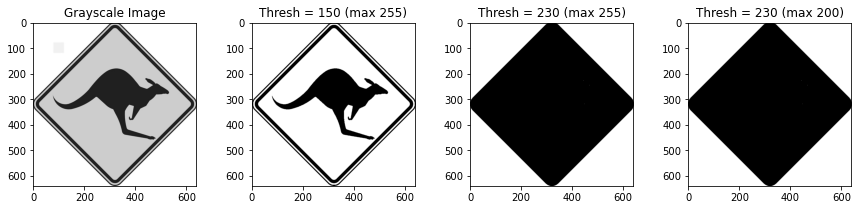

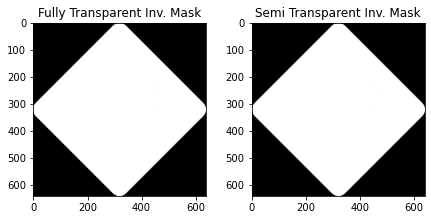

In [4]:
ret1, thresh1 = cv2.threshold(img_kang_gray, 150, 255, cv2.THRESH_BINARY)
ret2, thresh2 = cv2.threshold(img_kang_gray, 230, 255, cv2.THRESH_BINARY)
ret3, thresh3 = cv2.threshold(img_kang_gray, 230, 200, cv2.THRESH_BINARY)

kang_inv_mask_full = cv2.bitwise_not(thresh2)  # Fully transparent
kang_inv_mask_semi = cv2.bitwise_not(thresh3)  # Semi-transparent (due to max value of thresh3 - 200)

# Print the pixel intensity of the inverted binary mask at the location (100, 100).
print(f'Inverse Mask (full) at (100): {kang_inv_mask_full[100, 100]}');
print(f'Inverse Maks (semi) at (100): {kang_inv_mask_semi[100, 100]}')

plt.figure(figsize=(15, 3))
plt.subplot(141); plt.imshow(img_kang_gray); plt.title('Grayscale Image')
plt.subplot(142); plt.imshow(thresh1); plt.title('Thresh = 150 (max 255)')
plt.subplot(143); plt.imshow(thresh2); plt.title('Thresh = 230 (max 255)')
plt.subplot(144); plt.imshow(thresh3); plt.title('Thresh = 230 (max 200)')
plt.figure(figsize=(15, 7))
plt.subplot(245); plt.imshow(kang_inv_mask_full); plt.title('Fully Transparent Inv. Mask')
plt.subplot(246); plt.imshow(kang_inv_mask_semi); plt.title('Semi Transparent Inv. Mask');

### Add the Alpha Channel to the image.

We will use the *merge()* and *split()* function along with the mask to create the alpha channel.

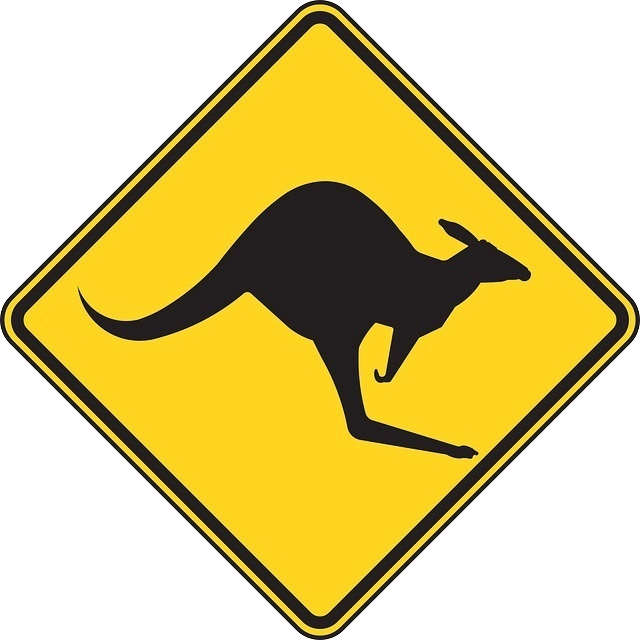

In [5]:
# Split the color channels from the original image.
bk, gk, rk = cv2.split(img_kang)

# Add the "mask" as the 4th channel.
mat = [bk, gk, rk, kang_inv_mask_full]

# Use the merge() function to create a single multi-channel array.
kangaroo_transparent = cv2.merge(mat)

# Save the transparent image as PNG file to preserve the alpha channel.
cv2.imwrite('kangaroo_alpha_transparent.png', kangaroo_transparent)

# Display the PNG file we just created.
Image(filename='kangaroo_alpha_transparent.png', width=300)

### Create semi transparent PNG

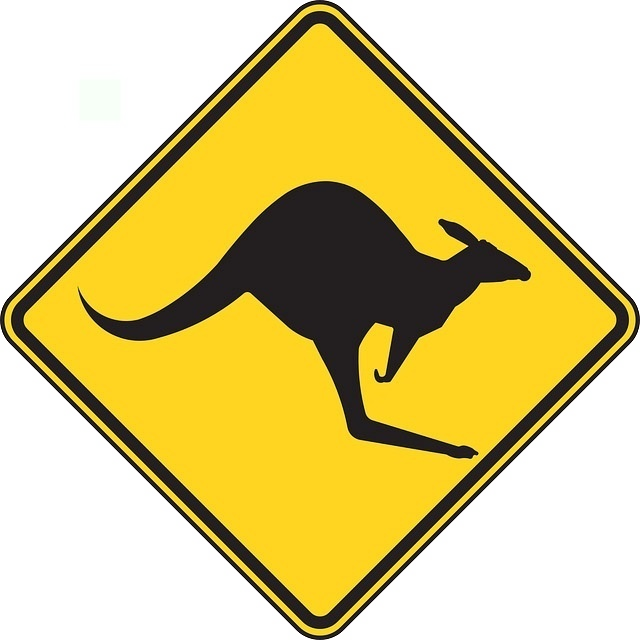

In [6]:
# Split the color channels from the original image.
bk, gk, rk = cv2.split(img_kang)

# Add the "mask" as the 4th channel.
mat = [bk, gk, rk, kang_inv_mask_semi]

# Use the merge() function to create a single multi-channel array.
kangaroo_semi = cv2.merge(mat)

# Save the transparent image as a PNG file to preserve the alpha channel.
cv2.imwrite('kangaroo_alpha_semi.png', kangaroo_semi)

# Display the PNG file we just created.
Image(filename='kangaroo_alpha_semi.png', width=300)

We are going to decompose the PNG file into its channel components and see what's happening there.

### Inspect the channels of the fully transparent PNG file we just created

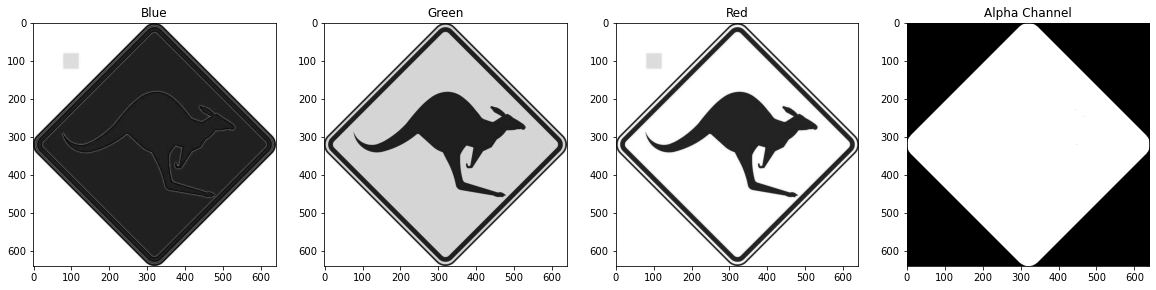

In [7]:
# Read the PNG image using: cv2.IMREAD_UNCHANGED to retain the alpha channel.
img = cv2.imread('kangaroo_alpha_transparent.png', cv2.IMREAD_UNCHANGED)

# Split the channels.
b, g, r, a = cv2.split(img)

# Display each of the channel.
plt.figure(figsize=(20, 15))
plt.subplot(141); plt.imshow(b); plt.title('Blue')
plt.subplot(142); plt.imshow(g); plt.title('Green')
plt.subplot(143); plt.imshow(r); plt.title('Red')
plt.subplot(144); plt.imshow(a); plt.title('Alpha Channel');